**Tech Layoffs Analysis**

Part 1:Basic Data Understanding (Pandas)


Load the CSV file into a Pandas DataFrame.


In [ ]:
import pandas as pd
data=pd.read_csv('/content/tech_layoffs.csv')
data

,company,company_size,employees_fired
0,Apple,147000,0
1,Microsoft,181000,6000
2,Google,139500,15000
3,Amazon,1300000,12000
4,Facebook,60750,11000
...,...,...,...
95,Airbnb,448047,1012
96,Uber,1206139,51658
97,GoJek,302489,7084
98,Freshworks,646552,7670


Display the first 10 rows.


In [ ]:
data.head(10)

,company,company_size,employees_fired
0,Apple,147000,0
1,Microsoft,181000,6000
2,Google,139500,15000
3,Amazon,1300000,12000
4,Facebook,60750,11000
5,Tesla,70000,1000
6,Palantir,1008569,72661
7,PhonePe,850789,89997
8,Ola,135654,3909
9,Oracle,1116585,50166


Show shape, column names, and data types.


In [ ]:
print("Size of the dataset:")
print(data.shape)
print("\nColumn names:\n",data.columns.tolist())
print("\nData Types:")
print(data.dtypes)

Size of the dataset:
(100, 3)

Column names:
 ['company', 'company_size', 'employees_fired']

Data Types:
company            object
company_size        int64
employees_fired     int64
dtype: object


Check for missing values and duplicates.


In [ ]:
data.isna().sum()

,0
company,0
company_size,0
employees_fired,0


In [ ]:
print(data.duplicated().sum())

0


Use .describe() to get summary statistics.


In [ ]:
data.describe()

,company_size,employees_fired
count,1.000000e+02,100.000000
mean,7.557156e+05,57355.620000
std,4.615541e+05,52862.274156
min,7.137000e+03,0.000000
25%,3.370110e+05,12968.250000
50%,8.116580e+05,42510.500000
75%,1.180989e+06,94080.750000
max,1.468680e+06,206083.000000


Part 2: Data Cleaning


Ensure company_size and employees_fired are stored as integers.

In [ ]:
data.dtypes

,0
company,object
company_size,int64
employees_fired,int64


Remove any extra spaces in company names.


In [ ]:
data['company']=data['company'].str.strip()
print(data['company'])

0          Apple
1      Microsoft
2         Google
3         Amazon
4       Facebook
         ...    
95        Airbnb
96          Uber
97         GoJek
98    Freshworks
99         Slack
Name: company, Length: 100, dtype: object


Check for any negative values in employees_fired or company_size and correct them if needed.


In [ ]:
print("Negative values in 'employees_fired':")
print(data[data['employees_fired'] < 0])
print("\nNegative values in 'company_size':")
print(data[data['company_size'] < 0])
# Replace negative values with NaN
data['employees_fired']=data['employees_fired'].apply(lambda x:x if x >= 0 else pd.NA)
data['company_size']=data['company_size'].apply(lambda x:x if x >= 0 else pd.NA)

Negative values in 'employees_fired':
Empty DataFrame
Columns: [company, company_size, employees_fired]
Index: []

Negative values in 'company_size':
Empty DataFrame
Columns: [company, company_size, employees_fired]
Index: []


Standardize company names to title case.


In [ ]:
data['company']=data['company'].str.title()
print(data['company'].str.title())

0          Apple
1      Microsoft
2         Google
3         Amazon
4       Facebook
         ...    
95        Airbnb
96          Uber
97         Gojek
98    Freshworks
99         Slack
Name: company, Length: 100, dtype: object


Part 3: Exploratory Data Analysis (EDA)


Calculate the total number of employees across all companies.


In [ ]:
total_employees=data['company_size'].sum()
print("Total number of employees across all companies:",total_employees)

Total number of employees across all companies: 75571557


Calculate the total number of employees laid off across all companies.


In [ ]:
total_employees_fired=data['employees_fired'].sum()
print("Total number of employees fired across all companies:",total_employees_fired)

Total number of employees fired across all companies: 5735562


Find the company with the highest number of layoffs.

In [ ]:
company_highest_layoffs=data.sort_values(by='employees_fired', ascending=False).iloc[0]
print("Company with the highest number of layoffs:")
print(company_highest_layoffs[['company', 'employees_fired']])

Company with the highest number of layoffs:
company            Makemytrip
employees_fired        206083
Name: 63, dtype: object


Find the company with the highest layoff percentage.

In [ ]:
data['layoff_percentage']=(data['employees_fired'] / data['company_size']) * 100
company_highest_layoff_percentage=data.sort_values(by='layoff_percentage', ascending=False).iloc[0]
print("Company with the highest layoff percentage:")
print(company_highest_layoff_percentage[['company', 'layoff_percentage']])

Company with the highest layoff percentage:
company               Facebook
layoff_percentage    18.106996
Name: 4, dtype: object


Create a bar chart of layoffs per company.


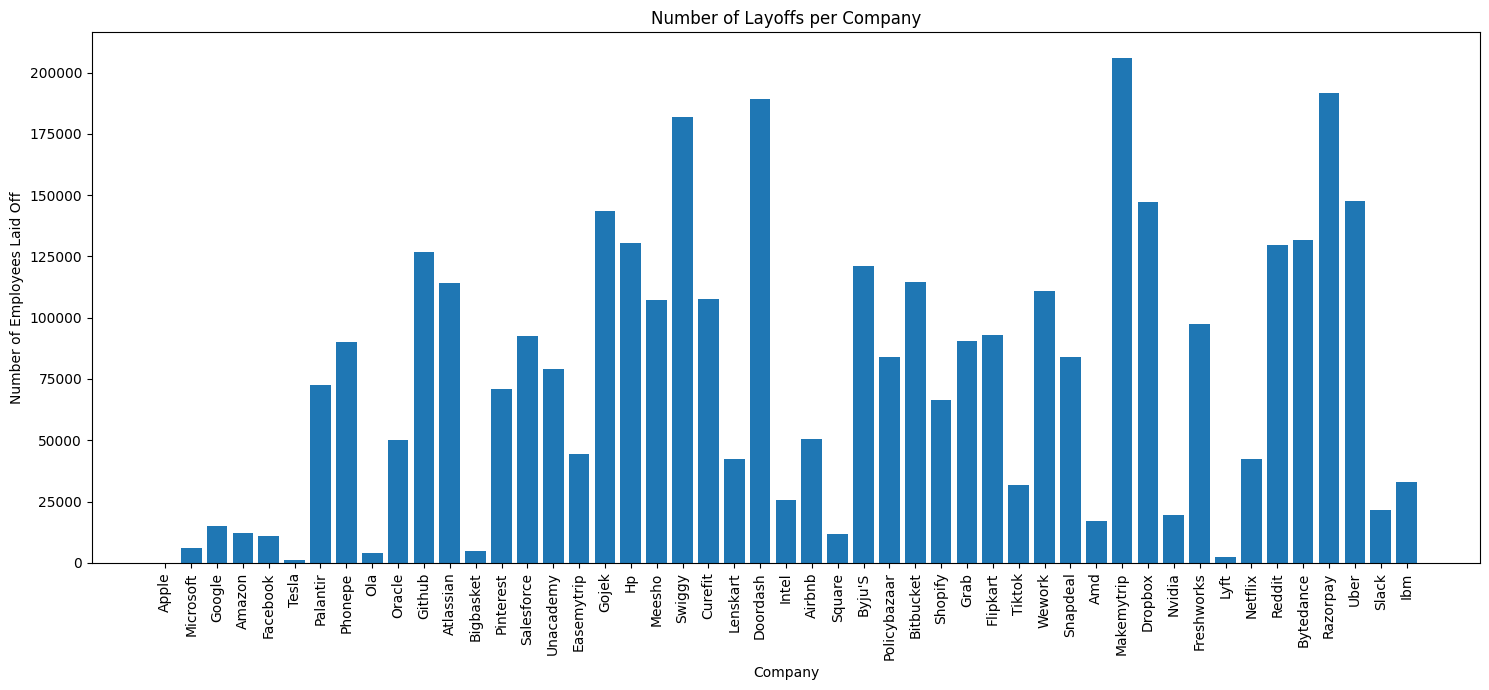

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.bar(data['company'], data['employees_fired'])
plt.xticks(rotation=90)
plt.title('Number of Layoffs per Company')
plt.xlabel('Company')
plt.ylabel('Number of Employees Laid Off')
plt.tight_layout()
plt.show()


Part 4: Statistics


Calculate mean, median, variance, and standard deviation of employees_fired.


In [ ]:
mean= data['employees_fired'].mean()
variance= data['employees_fired'].var()
std_deviation= data['employees_fired'].std()
print(mean)
print(variance)
print(std_deviation)

57355.62
2794420028.9248495
52862.27415581787


Find the probability that a company laid off more than 5% of its employees.


In [ ]:
companies_with_high_layoff_percentage = data[data['layoff_percentage'] > 5]
probability_high_layoff=len(companies_with_high_layoff_percentage) / len(data)
print("The probability that a company laid off more than 5% of its employees is:",probability_high_layoff)

The probability that a company laid off more than 5% of its employees is: 0.63


Find the percentage of companies with layoffs greater than 10,000 employees.


In [ ]:
companies_with_layoff=data[data['employees_fired']>10000]
percentage_companies_with_layoff=(len(companies_with_layoff)/len(data))*100
print(percentage_companies_with_layoff)

78.0


Part 5:Linear Algebra & NumPy


Convert company_size and employees_fired into NumPy arrays.


In [ ]:
import numpy as np
company_size_np = data['company_size'].values
employees_fired_np = data['employees_fired'].values
print("NumPy array for 'company_size':")
print(company_size_np)
print("\nNumPy array for 'employees_fired':")
print(employees_fired_np)

NumPy array for 'company_size':
[ 147000  181000  139500 1300000   60750   70000 1008569  850789  135654
 1116585 1427799 1108146   39718   35514  934246  297770  785272 1432228
  492220  461517 1365450  905375 1084540 1274917  800433  442472    7137
 1240414  266656  489332 1468609  144959  529059  633768  968712 1268807
  449561  323225  541906 1372325  497712  249765  163487  804896 1120609
 1145595  256183 1268382  850922  818420  963223  333858 1365533 1201287
 1067630  929193  622962  984988 1326712  407621 1109587  886636  212499
 1424064  956320 1342497 1007515 1289105   19219  435060  721371   89004
   28927  798065  280811  858258 1201702 1427493  935775  577358   45703
  985718  614876   46138 1468680 1424533 1195668 1176096  338062 1387660
  342628  454430 1443093 1251343  342108  448047 1206139  302489  646552
  869416]

NumPy array for 'employees_fired':
[     0   6000  15000  12000  11000   1000  72661  89997   3909  50166
  75006 114143   2716   5023  70940  29899 10788

Perform vector subtraction (company_size - employees_fired).

In [ ]:
employees_remaining_np=company_size_np-employees_fired_np
print(employees_remaining_np)

[ 147000  175000  124500 1288000   49750   69000  935908  760792  131745
 1066419 1352793  994003   37002   30491  863306  267871  677386 1353189
  485724  417025 1221817  774780 1062706 1164609  692776  399988    6983
 1063985  241174  438978 1279271  143290  488362  541144  884860 1154419
  382955  307264  511345 1279231  423537  218193  148101  694008 1038287
 1141556  242547 1245878  743666  720628  897172  322277 1183706 1124991
 1047839  845063  620902  887947 1270619  394330 1019195  869539  192783
 1217981  829719 1292822  982236 1142083   18750  415674  623979   81817
   26647  755528  253164  737078 1071940 1413229  925934  519482   44909
  854125  588582   45170 1418146 1292019 1164356 1028681  293604 1195933
  321119  447618 1342066 1218514  309467  447035 1154481  295405  638882
  868215]


Compute the dot product of company_size and employees_fired.


In [ ]:
dot_product=np.dot(company_size_np,employees_fired_np)
print(dot_product)

5915259851695


Perform matrix multiplication:


Features = [company_size, employees_fired]


Weights = [0.4, 0.6]


In [ ]:
features=np.array([company_size_np, employees_fired_np]).T
weights=np.array([0.4, 0.6])
matrix_multiplication=np.dot(features, weights)
print("Result of matrix multiplication:")
print(matrix_multiplication)

Result of matrix multiplication:
[ 58800.   76000.   64800.  527200.   30900.   28600.  447024.2 394313.8
  56607.  476733.6 616123.2 511744.2  17516.8  17219.4 416262.4 137047.4
 378840.4 620314.6 200785.6 211302.  632359.8 440507.  446916.4 576151.6
 384767.4 202479.2   2947.2 602023.  121951.6 225945.2 701046.4  58985.
 236041.8 309081.6 437796.  576155.6 219788.  138866.6 235099.  604786.4
 243589.8 118849.2  74626.4 388491.2 497636.8 460661.4 110654.8 520855.2
 404722.4 386043.2 424919.8 140491.8 655309.4 526292.4 438926.6 422155.2
 250420.8 452219.8 564340.6 171023.  498070.  364912.6  96829.2 693275.4
 458488.6 566803.8 418173.4 603855.2   7969.  185655.6 346983.6  39913.8
  12938.8 344748.2 128912.6 416011.2 558538.  579555.6 380214.6 265668.8
  18757.6 473243.  261726.8  19036.  617792.4 649321.6 497054.4 558887.4
 161899.6 670100.2 149956.6 185859.2 637853.4 520234.6 156427.8 179826.
 513450.4 125246.  263222.8 348487. ]


Part 6: Feature Engineering


Create a new column Layoff_Percentage = (employees_fired / company_size) * 100 (rounded to 2 decimal places).


In [ ]:
data['layoff_percentage']=(data['employees_fired'] / data['company_size']) * 100
data['layoff_percentage']=data['layoff_percentage'].round(2)
data


,company,company_size,employees_fired,layoff_percentage
0,Apple,147000,0,0.00
1,Microsoft,181000,6000,3.31
2,Google,139500,15000,10.75
3,Amazon,1300000,12000,0.92
4,Facebook,60750,11000,18.11
...,...,...,...,...
95,Airbnb,448047,1012,0.23
96,Uber,1206139,51658,4.28
97,Gojek,302489,7084,2.34
98,Freshworks,646552,7670,1.19


Create a High_Layoff column (1 if Layoff_Percentage > 5, else 0).


In [ ]:
data['high_layoff']=data['layoff_percentage'].apply(lambda x:1 if x>5 else 0)
data

,company,company_size,employees_fired,layoff_percentage,high_layoff
0,Apple,147000,0,0.00,0
1,Microsoft,181000,6000,3.31,0
2,Google,139500,15000,10.75,1
3,Amazon,1300000,12000,0.92,0
4,Facebook,60750,11000,18.11,1
...,...,...,...,...,...
95,Airbnb,448047,1012,0.23,0
96,Uber,1206139,51658,4.28,0
97,Gojek,302489,7084,2.34,0
98,Freshworks,646552,7670,1.19,0


Rank companies into quartiles based on Layoff_Percentage.

In [ ]:
data['layoff_percentage_quartile']=pd.qcut(data['layoff_percentage'],q=4,labels=False)
display(data[['company','layoff_percentage','layoff_percentage_quartile']].sort_values(by='layoff_percentage'))

,company,layoff_percentage,layoff_percentage_quartile
0,Apple,0.00,0
99,Slack,0.14,0
95,Airbnb,0.23,0
56,Amd,0.33,0
45,Bitbucket,0.35,0
...,...,...,...
63,Makemytrip,14.47,3
33,Salesforce,14.61,3
36,Shopify,14.82,3
40,Curefit,14.90,3


Part 7 – SQL Simulation in Pandas


Select all companies with Layoff_Percentage > 5 and order them by Layoff_Percentage descending.


In [ ]:
display(data[data['layoff_percentage'] > 5].sort_values(by='layoff_percentage',ascending=False))

,company,company_size,employees_fired,layoff_percentage,high_layoff,layoff_percentage_quartile
4,Facebook,60750,11000,18.11,1,3
40,Curefit,497712,74175,14.90,1,3
36,Shopify,449561,66606,14.82,1,3
33,Salesforce,633768,92624,14.61,1,3
63,Makemytrip,1424064,206083,14.47,1,3
...,...,...,...,...,...,...
38,Grab,541906,30561,5.64,1,1
17,Unacademy,1432228,79039,5.52,1,1
73,Netflix,798065,42537,5.33,1,1
46,Snapdeal,256183,13636,5.32,1,1


Get the top 3 companies with the highest layoff counts.

In [ ]:
display(data.sort_values(by='employees_fired',ascending=False).head(3))

,company,company_size,employees_fired,layoff_percentage,high_layoff,layoff_percentage_quartile
63,Makemytrip,1424064,206083,14.47,1,3
89,Razorpay,1387660,191727,13.82,1,3
30,Doordash,1468609,189338,12.89,1,3


Sort companies alphabetically and show company and Layoff_Percentage.


In [ ]:
display(data[['company', 'layoff_percentage']].sort_values(by='company'))

,company,layoff_percentage
29,Airbnb,10.29
95,Airbnb,0.23
3,Amazon,0.92
56,Amd,0.33
61,Amd,1.93
...,...,...
87,Uber,12.53
96,Uber,4.28
17,Unacademy,5.52
43,Wework,13.78


Part 8 – Insights

Which company had the highest layoffs in percentage terms?

In [ ]:
company_highest_layoff_percentage=data.sort_values(by='layoff_percentage', ascending=False).iloc[0]
display(company_highest_layoff_percentage[['company','layoff_percentage']])

,4
company,Facebook
layoff_percentage,18.11


Which company had the most employees fired in absolute numbers?

In [ ]:
company_with_mostfired=data.sort_values(by='employees_fired',ascending=False).iloc[0]
display(company_with_mostfired[['company','employees_fired']])

,63
company,Makemytrip
employees_fired,206083


What is the average layoff percentage across all companies?


In [ ]:
avg_layoff_percentage=data['layoff_percentage'].mean()
print(avg_layoff_percentage)


7.384200000000001


Which quartile of Layoff_Percentage has the highest average company_size?

In [ ]:
quartile_layoff_percentage = data.groupby('layoff_percentage_quartile')['company_size'].mean()
display(quartile_layoff_percentage.sort_values(ascending=False).head(1))

,company_size
layoff_percentage_quartile,
3,852212.0
